In [9]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from keyname import keyname as kn
from matplotlib import colors as mpl_colors
from teeplot import teeplot as tp

import Bio
import csv
import glob
import itertools
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
import urllib.request as request

from etlib.SortableTree.SortableTree import SortableTree, find_leaves
from etlib.PlotTools.PlotTools import enable_pretty_graphing
enable_pretty_graphing()

# get data

## get morphologies

In [2]:
morphs = {x['stint']: x[' morph'][1:] for x in pd.read_csv('morphs_by_stint.csv').to_dict(orient='records')}

## load distance matrix

In [3]:
matrix = np.loadtxt("data/distance_matrix.matrix")

## load stint tags

In [4]:
with open("data/stint_tags.json", 'r') as f:
    stint_tags = json.loads(f.read())

# generate phylogenetic tree

In [5]:
def to_tril(matrix):
    return [
        row[:row_idx] + [0.0]
        for row_idx, row in enumerate(matrix.tolist())
    ]

def set_color(x):
    return mpl_colors.to_hex('C' + str(ord(x[-2]) - ord('a')))

def fix_branch_length(root):
    if 'Inner' not in root.name:
        root.branch_length = 1
    else:
        root.branch_length = sum([x.branch_length for x in root]) / len([x.branch_length for x in root])
    for x in root:
        fix_branch_length(x)

In [6]:
dm = Bio.Phylo.TreeConstruction.DistanceMatrix(
    names=[str(x) for x in range(len(stint_tags))],
    matrix=to_tril(matrix.T)
)
# tree = getattr(DistanceTreeConstructor(), 'upgma')(dm)
tree = getattr(DistanceTreeConstructor(), 'nj')(dm)

In [7]:
fix_branch_length(tree.clade)         
new_tree = SortableTree(root=tree.clade)
new_tree.fix_inner_nodes()
new_tree.sort_tree(reverse=False)

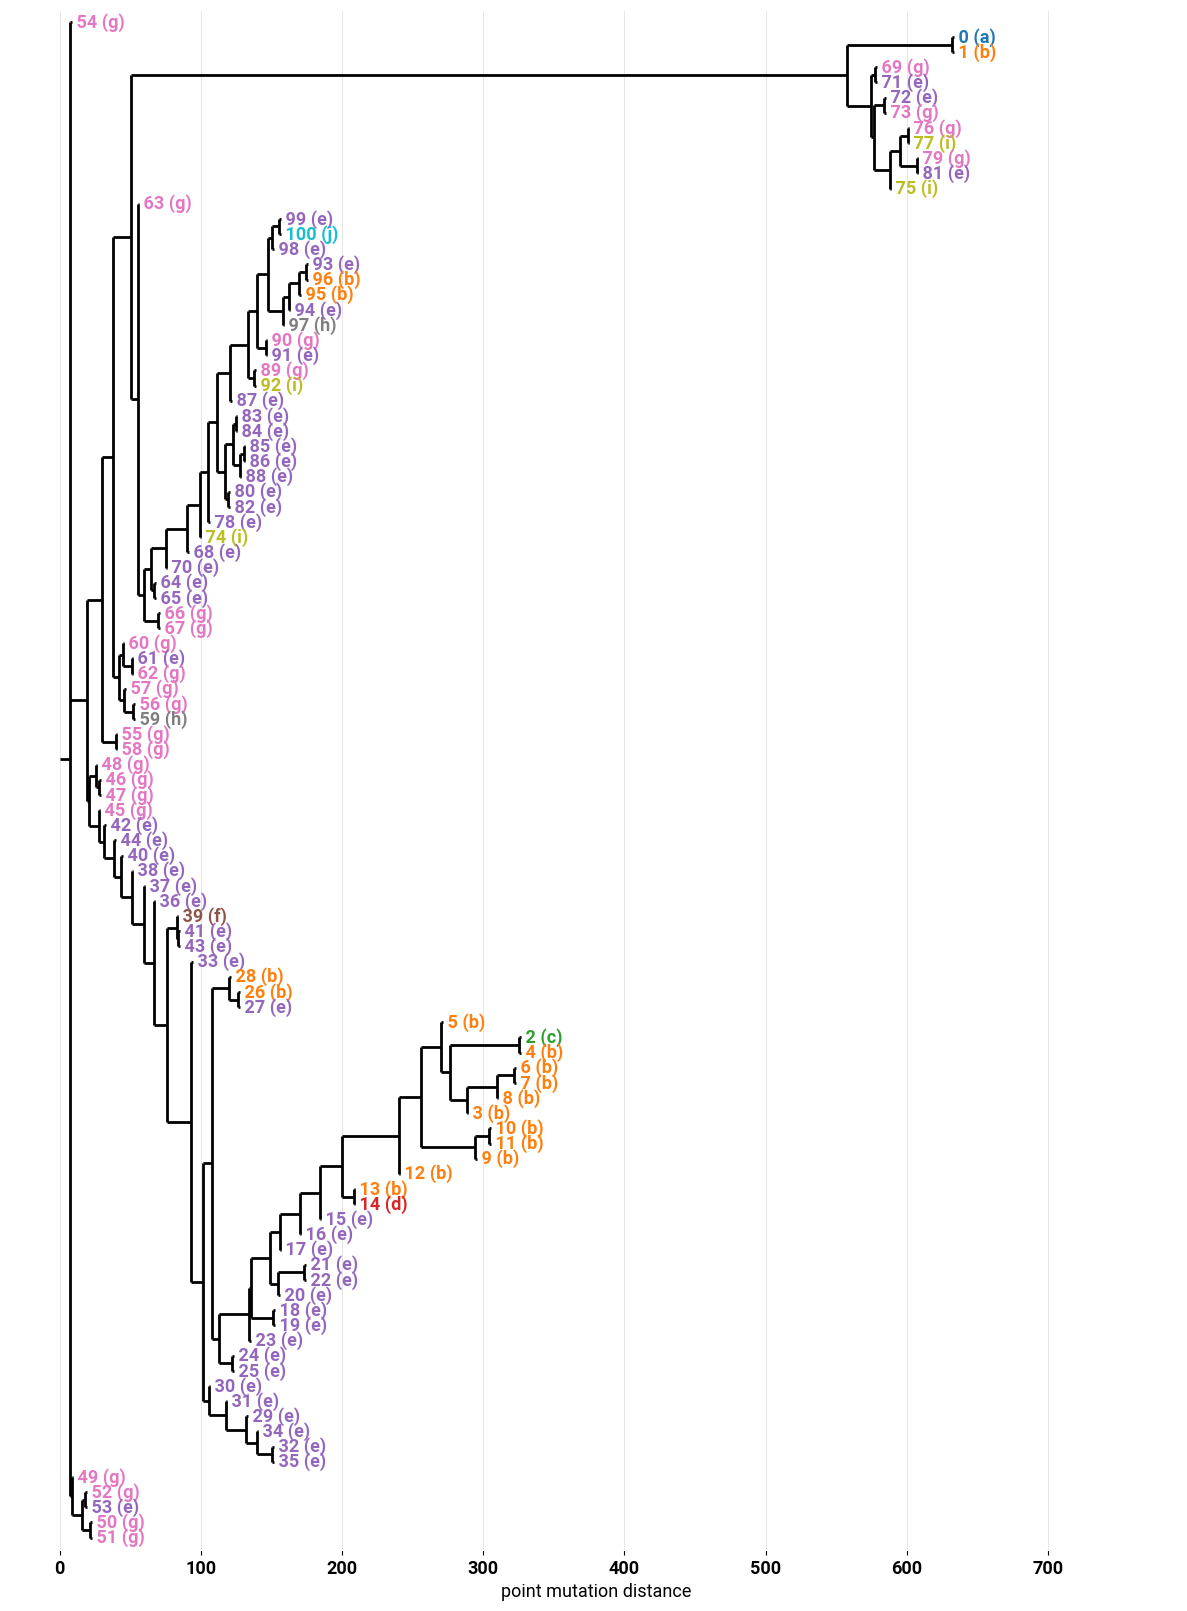

teeplots/phylo_tree/viz=draw+ext=.pdf
teeplots/phylo_tree/viz=draw+ext=.png


<Figure size 1500x2000 with 0 Axes>

In [8]:
tp.tee(
    Phylo.draw,
    new_tree,
    label_func=lambda x: str(x) + " (" + morphs[int(x.name)] + ")" if 'Inner' not in str(x) else None,
    branch_labels=None,
    label_colors=lambda x: set_color(x),
    xlabel=["point mutation distance"],
    ylabel=[""],
    yticks={"ticks": [0]},
    grid={"visible": True, "which": "both", "axis": "x", "color": "gainsboro", "linewidth": "0.5"},
#     axhspan=((1, 2), {'facecolor':'gainsboro'}),
    teeplot_subdir="phylo_tree",
    do_show=False,
)